##  <center> Assignment -3 </center>

#### Bhumi Patel (B00824756)
#### Jay Sharma (B00824331)

<hr>


#### Q1. Find all the vessels that visited ports in the provided shapefile (Nima_Ports.Zip)
     -   According to the 'mmsi values' in the given 'AISData.CSV' file, There is only one vessels because mmsi is   unique number which used to idetify vessel.All AISData have same value for mmsi.

<br/>
1. Import necessary libraries for spatiotemporal problem.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import matplotlib.pyplot as plt
from shapely.geometry import Point
from pprint import pprint
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry.polygon import Polygon
import datetime
from pandas import DataFrame
from numpy.random import randn
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

2. Read the given port shape file.
   - File Contains Following fields
     1. port_name
     2. size
     3. Geometry location (polygon value)

In [2]:
port_data=gpd.read_file('Nima_ports/assignment3shapefile.shp')
print(port_data)

    field_1                    port_name    size  \
0         0                 pointpolygon  0.0000   
1         1                        port1  0.0018   
2         2                        port2  0.0018   
3         3                          ind  0.0000   
4         4                        port5  0.0018   
5         5                        port6  0.0018   
6         6                        port7  0.0018   
7         7              south_enterance  0.0000   
8         8                    auto_port  0.0015   
9         9  southend container terminal  0.0050   
10       10                     NN Jetty  0.0020   
11       11                 Bills island  0.0020   
12       12                  mid bedford  0.0040   
13       13                Fairview cove  0.0040   
14       14                     armament  0.0020   
15       15                 waterfront h  0.0020   
16       16                     northarm  0.0020   
17       17                         plll  0.0015   
18       18 

3.  Plot ports using matplotlib 

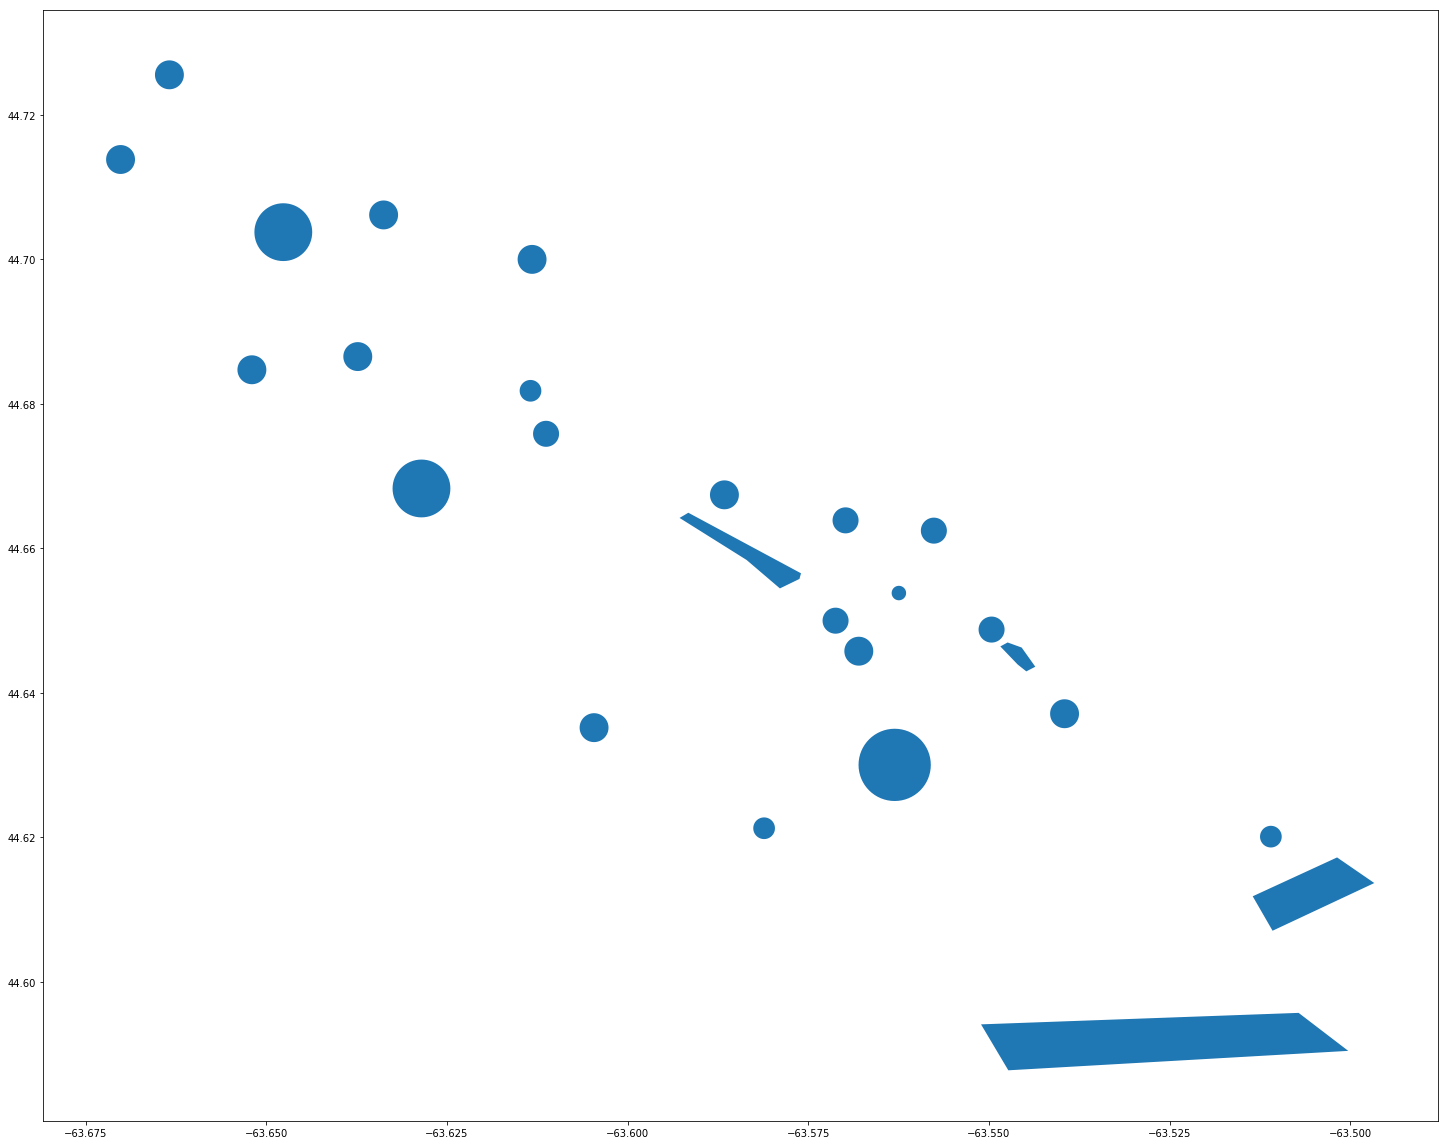

In [3]:
port_data.plot(figsize=(25,25))

4. create a buffer with radius="0.001 " around the shape of each polygons in the shapefile.

In [4]:
# create Buffer
buffered_data = port_data.buffer(0.001)
print(buffered_data.head())

0    POLYGON ((-63.59211224015373 44.66578987400187...
1    POLYGON ((-63.5684322045438 44.65004206767433,...
2    POLYGON ((-63.6084912045438 44.67590206767429,...
3    POLYGON ((-63.54790019975988 44.64785719834431...
4    POLYGON ((-63.56704920454379 44.66392406767437...
dtype: object


5. find all the AIS messages (from AIS data) that intersect with these ports 
  
   a. AISData has the following attributes:
      - event_time (in format: yyyy-mm-ddThh:mm.ssZ)
      - location.coordinates.0 (renamed to: location_coordinates_0)
      - location.coordinates.1 (renamed to: location_coordinates_1)
      - position_accuracy (constant 0.0)
      - mmsi (Maritime Mobile Service Identity)
      - sog (Speed over Ground)
      - cog (Course over Ground
  
   b. Change the column name(location.coordinates.0,location.coordinates.1) in AIS data and make it 'x' and 'y'

In [5]:
AISData=pd.read_csv('AISData.csv')
port_geometry=list(buffered_data);
port_name=list(port_data['port_name']);
x_value=list(AISData['x']);
y_value=list(AISData['y']);
density_list=[];
print("Port name and AIS messages which intersect each port")
for k in range(0,len(port_geometry)):
    total_messages=[]
    x_list=[];
    y_list=[];
    for i in range(0,len(x_value)):
        m=x_value[i];
        n=y_value[i];
        points = Point(x_value[i],y_value[i]);
        x=port_geometry[k].contains(points)
        if x is True:
            x_list.append(m);
            y_list.append(n);
            total_messages.append(points);
    print(port_name[k],len(total_messages)); 

Port name and AIS messages which intersect each port
pointpolygon 1094
port1 80
port2 229
ind 4504
port5 0
port6 0
port7 704943
south_enterance 44
auto_port 2215
southend container terminal 8722
NN Jetty 0
Bills island 0
mid bedford 0
Fairview cove 1552
armament 654
waterfront h 448
northarm 0
plll 0
pp 0
po001 2287
po002 2
oulier_maybecday 995
p003 0
enter2 0
p009 0
p010 14


### Q2. Show the density(number of AIS messages in a port). 
       

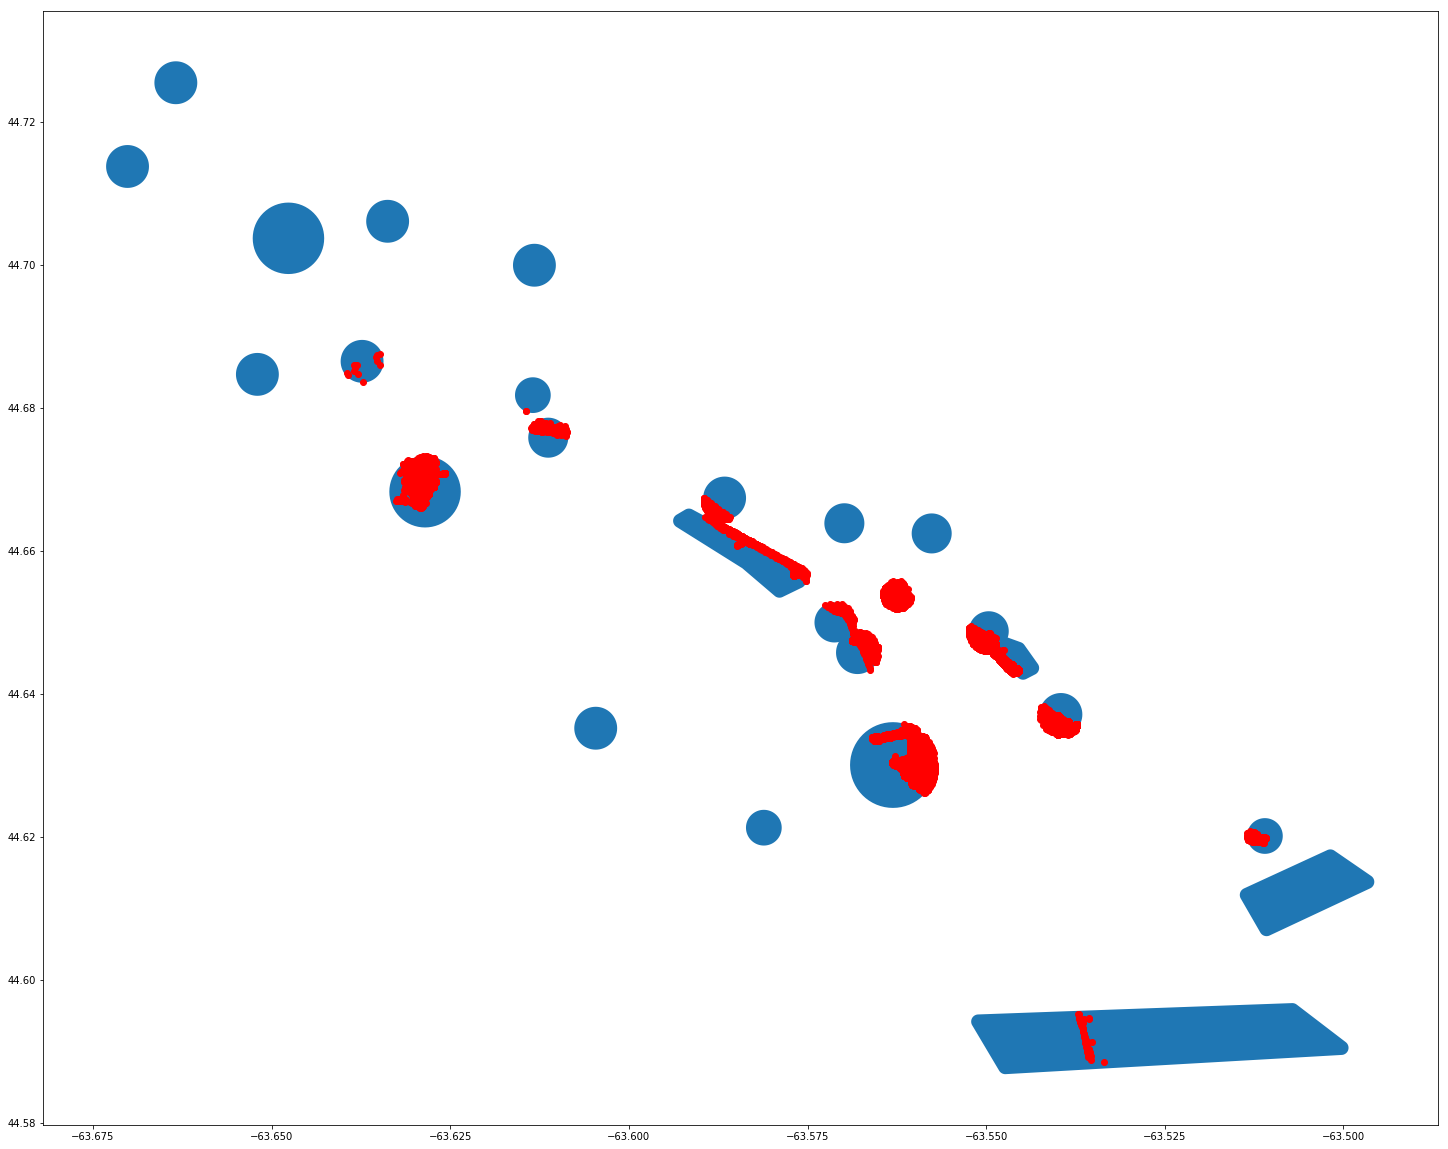

In [6]:
#Question 2
import matplotlib.pyplot as plt
port_geometry=list(buffered_data);
x_value=list(AISData['x']);
y_value=list(AISData['y']);

buffered_data.plot(figsize=(25,25))
for k in range(0,len(port_geometry)):
    a=[]
    x_list=[];
    y_list=[];
    for i in range(0,len(x_value)):
        m=x_value[i];
        n=y_value[i];
        points = Point(x_value[i],y_value[i]);
        x=port_geometry[k].contains(points)
        if x is True:
            x_list.append(m);
            y_list.append(n);
    plt.scatter(x_list, y_list, c="r");
plt.show();    

### Q3 Divide the AIS data into data frames with a one-hour interval

1. Convert 'event_time' data format into datetime date format.
  - There are 20 rows which does not contain proper date format,we have removed thar rows manually.

In [7]:
# conver data into datetime format.
event_time=list(AISData['event_time']);
new_event_time=[]
for k in event_time:
    x= pd.to_datetime(datetime.datetime.strptime(k,"%Y-%m-%dT%H:%M:%S.%fZ"));
    new_event_time.append(x);

In [8]:
#replace event_time column with new format data.
AISData['event_time']=new_event_time

2. To create dataframe with one hour interval.
   - The given AISDATA is between 2019-03-05 21:00 to 2019-07-13 04:30 
   - To generate List of one hour datetime, I used date_range with frequency='H'.

In [9]:
date_list=[]
index=pd.date_range('20190305 21:00','20190713 04:30',freq='H')
date_list=index

3.Using the genered date_list, create dataframe with one hour interval.
  - Total created dataframe=3103.

In [10]:
# make event_time index in AISData frame.
AISData.reset_index().set_index('event_time')

# list of Dataframe contains one hour data.
list_dataframe=[];


for i in range(0,len(date_list)-1):
    d=AISData[(AISData['event_time'] > date_list[i]) & (AISData['event_time'] <= date_list[i+1])]
    list_dataframe.append(d);
print(len(list_dataframe))

3103


4. generate plot for each dataframe.
   - Repeat the same method for all dataframe.
   - It will create total '3103' map 
   - To make it easy to show output I just show the 5 dataframe map plot, It will work same for others.

No of the total messages during this Hour 210


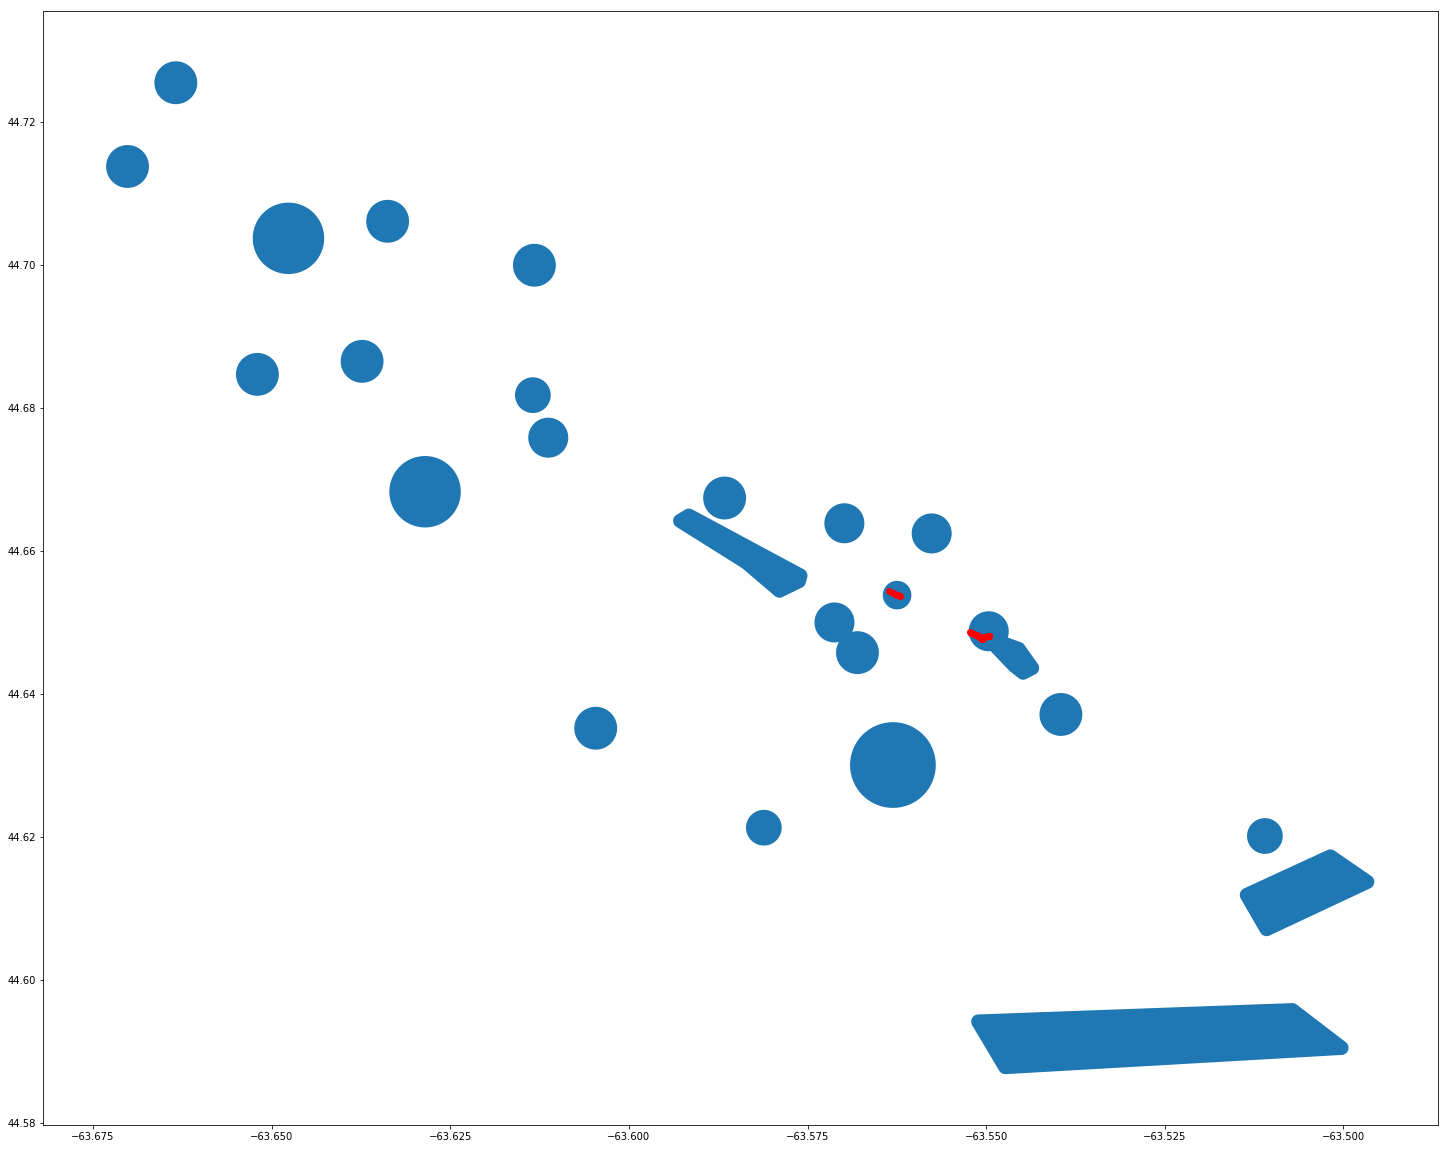

No of the total messages during this Hour 14


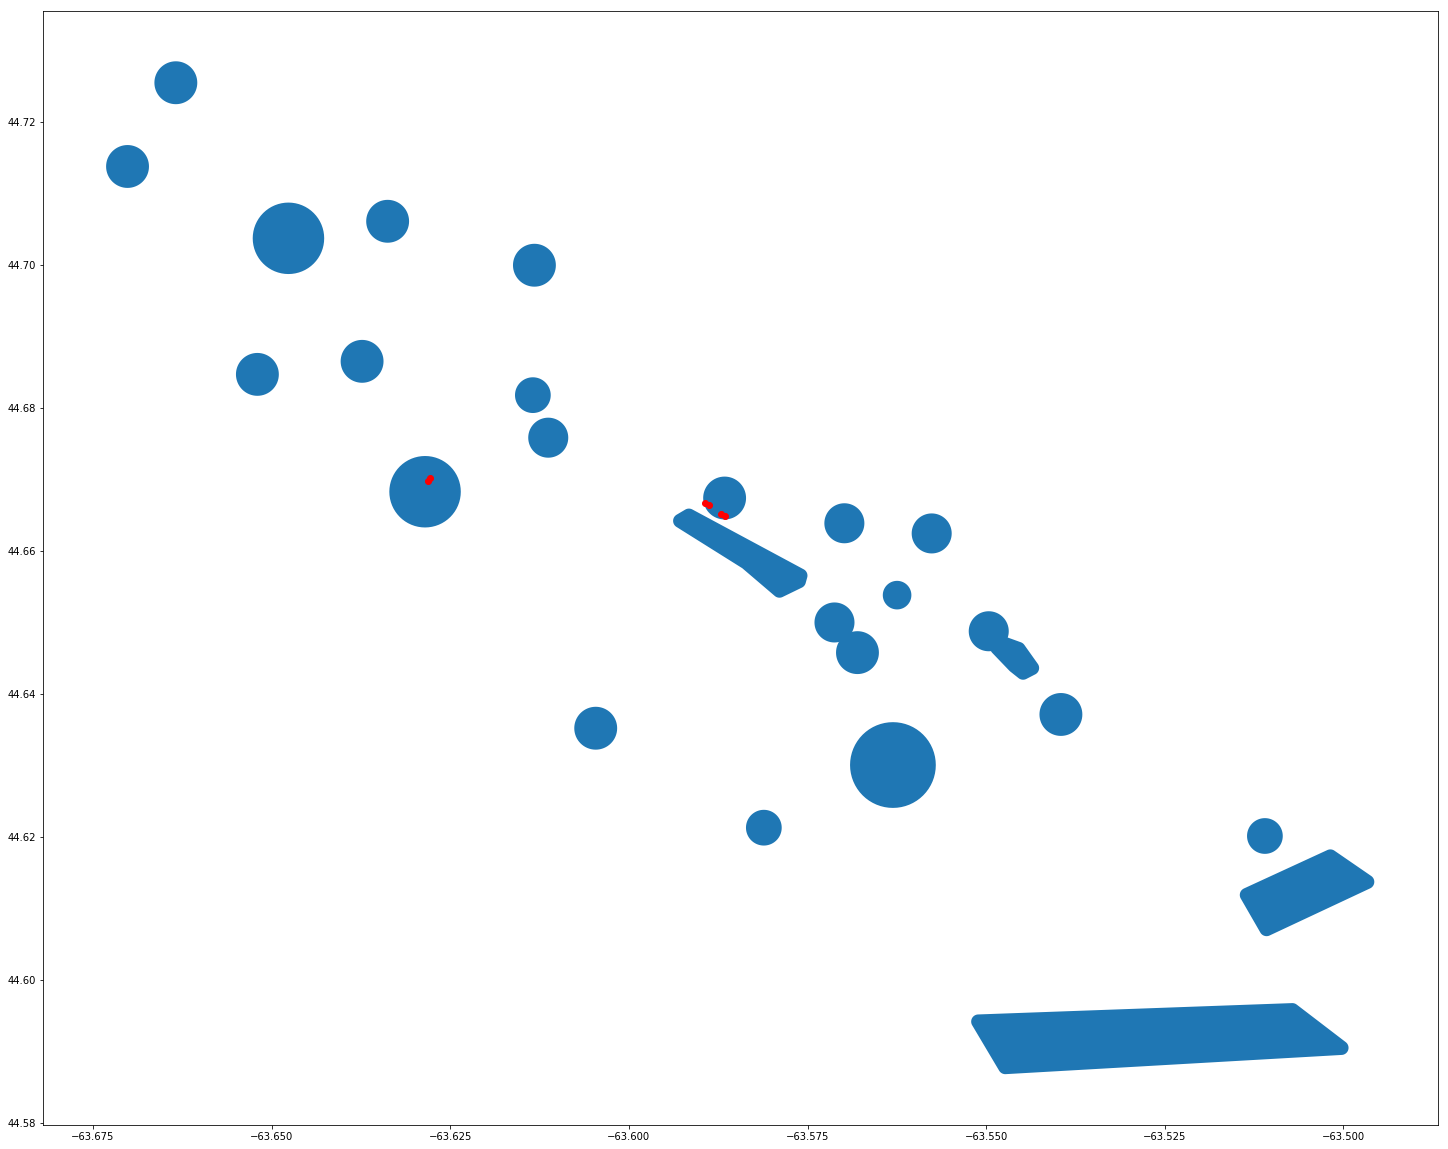

No of the total messages during this Hour 0


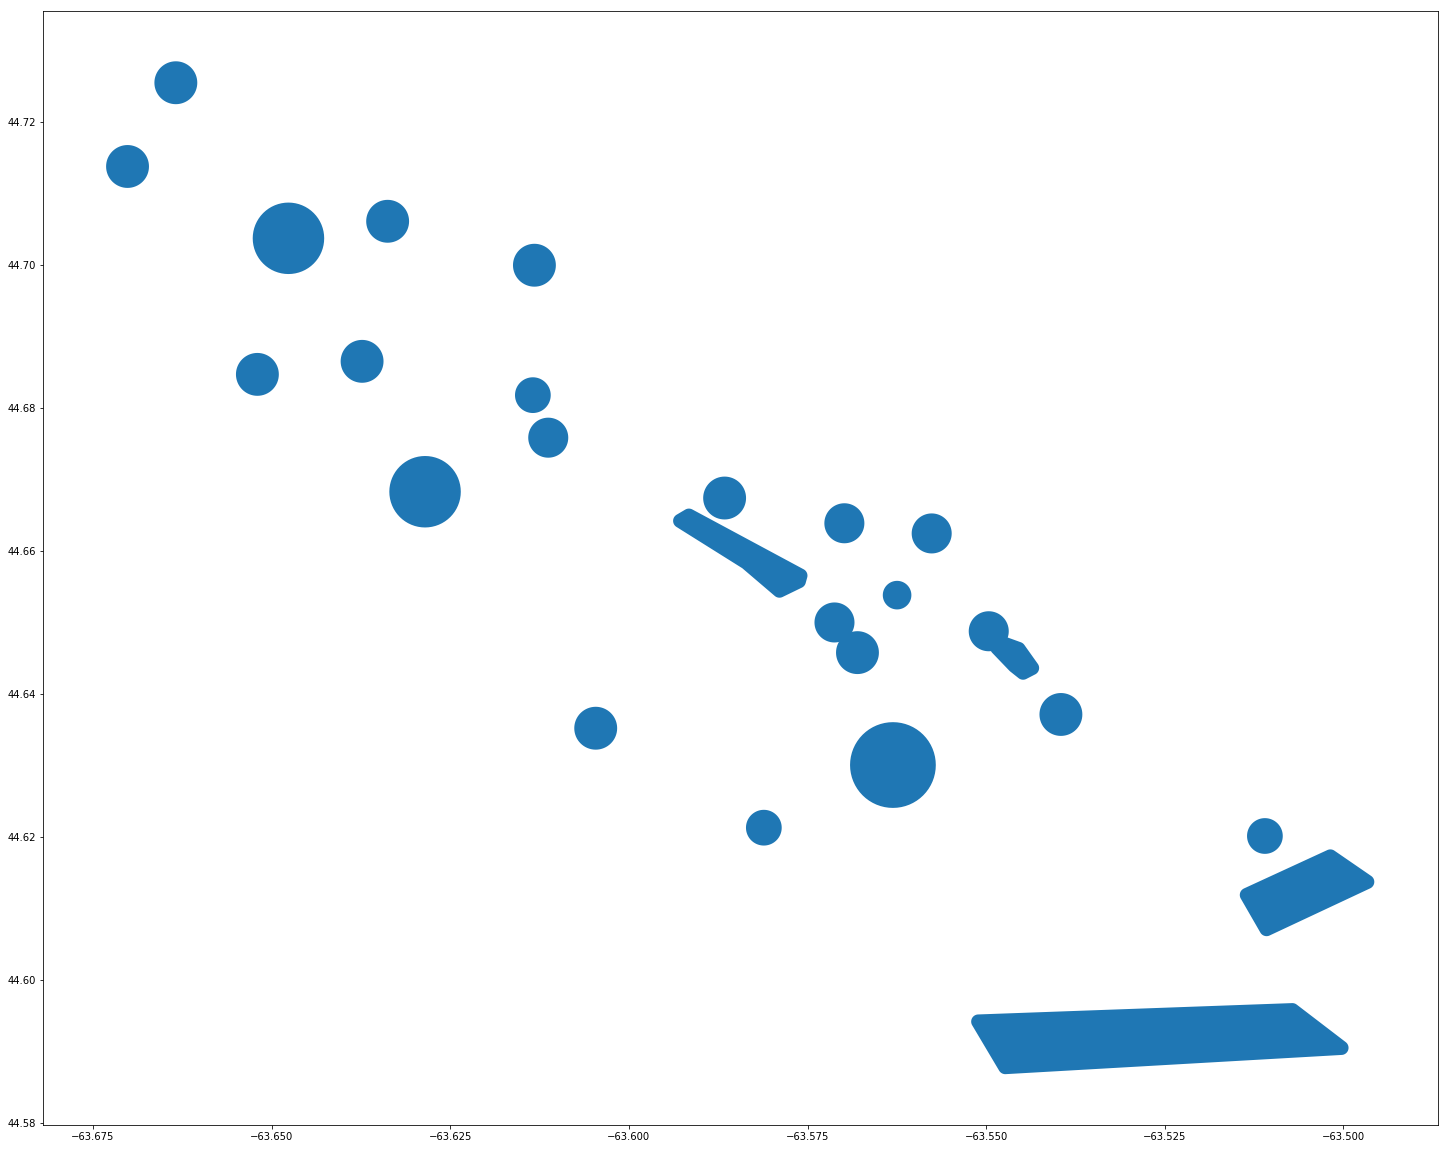

No of the total messages during this Hour 4


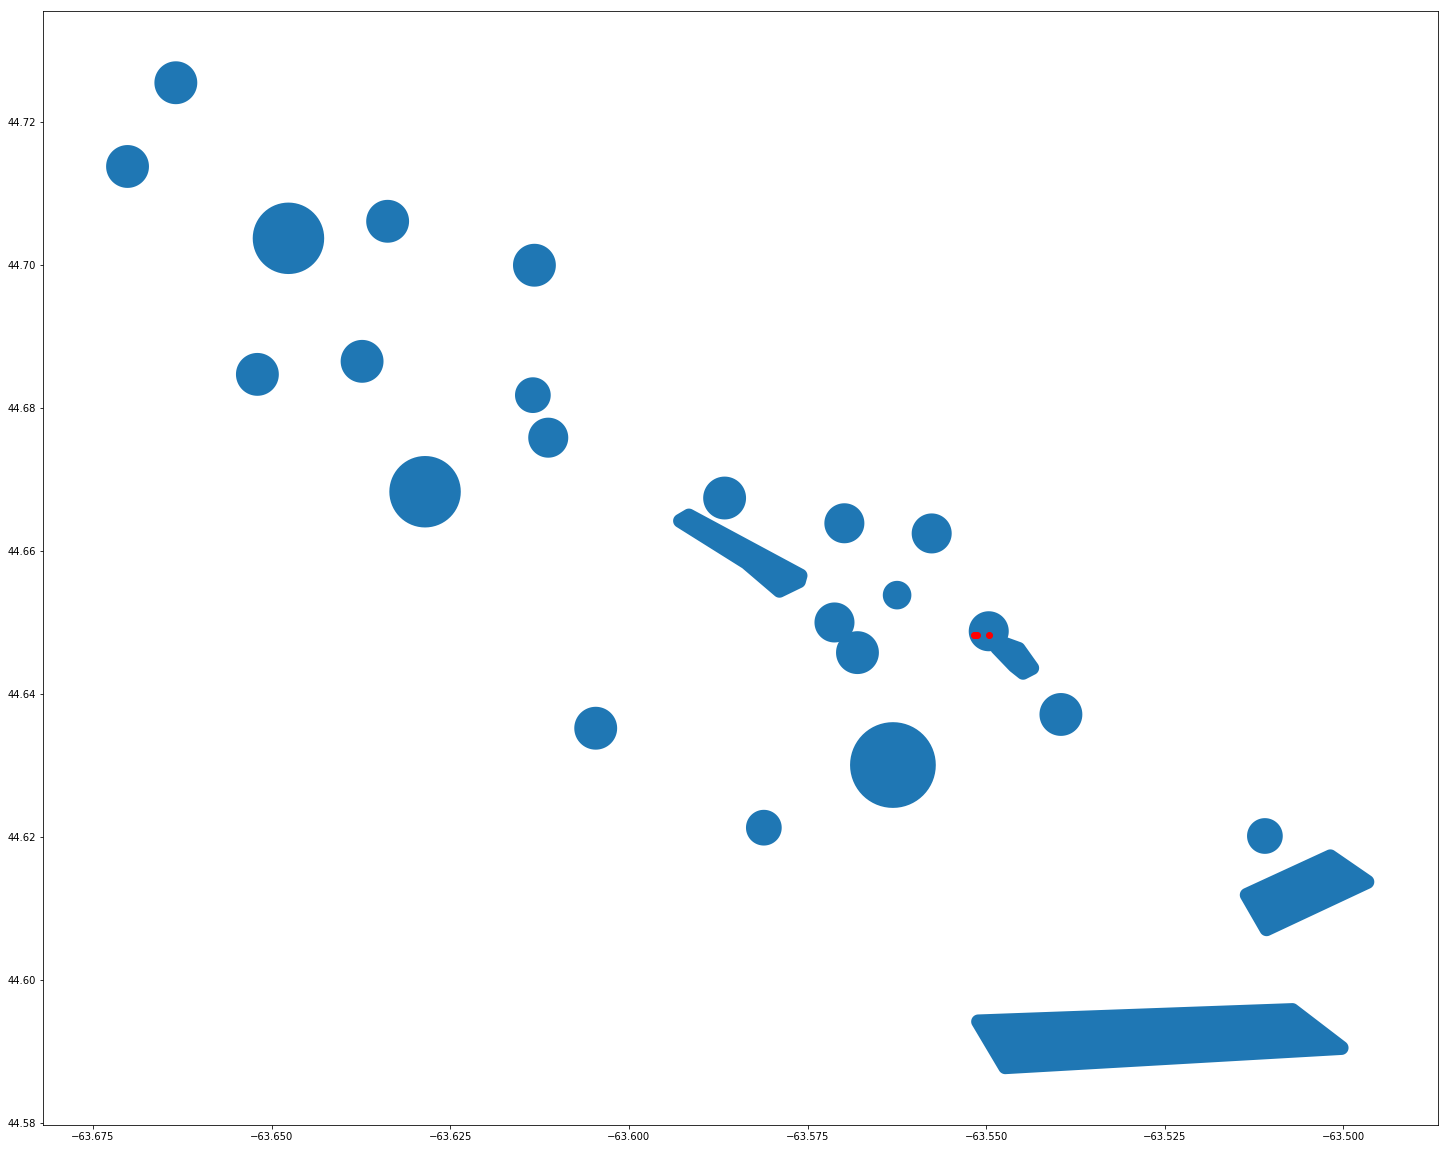

No of the total messages during this Hour 0


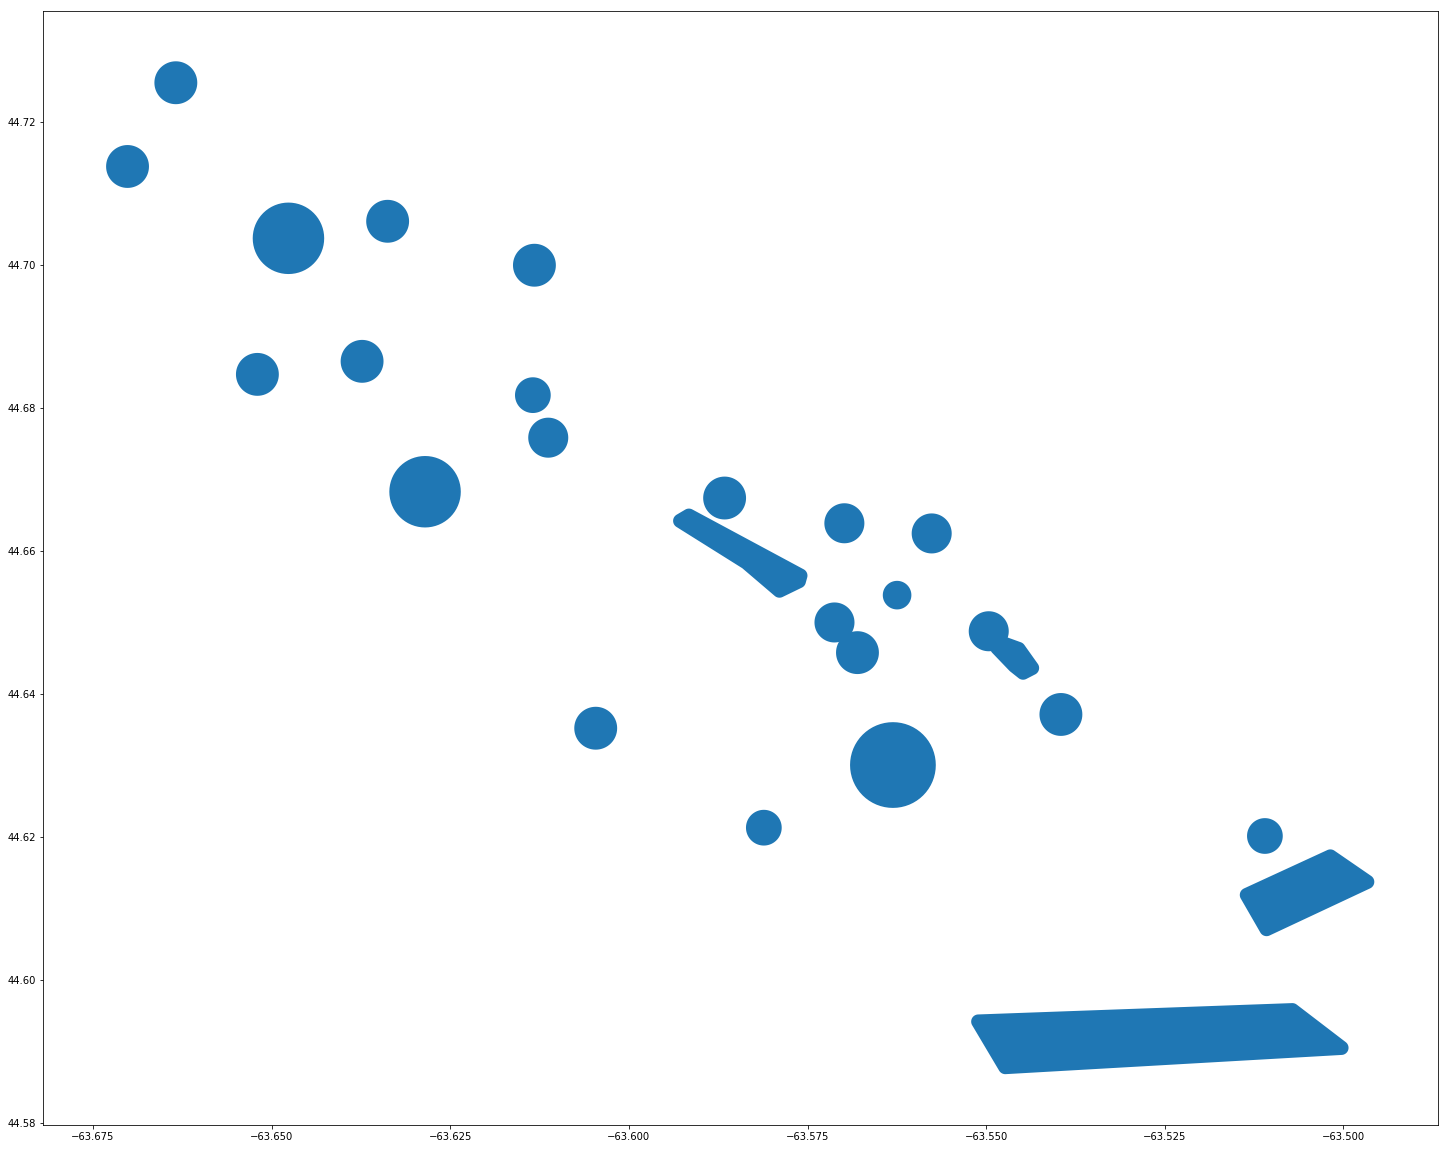

In [11]:
port_geometry=list(buffered_data);
map_plot_list=[]
#plt.draw()
for i in range(0,5):
    temp_frame=list_dataframe[i];
    print("No of the total messages during this Hour",len(temp_frame))
    x_list=list(temp_frame['x']);
    y_list=list(temp_frame['y']);
    buffered_data.plot(figsize=(25,25))
    for m in range(0,len(port_geometry)):
        a=[];
        x_v=[];
        y_v=[];
        for k in range(0,len(x_list)):
            q=x_list[k];
            n=y_list[k];
            points = Point(x_list[k],y_list[k]);
            x=port_geometry[m].contains(points)
            if x is True:
                x_v.append(q);
                y_v.append(n);
                a.append(points);
        plt.scatter(x_v, y_v,c='r');
    plt.show();
   

### Q4  Create a temporal chart for the density of messages in that port.

1. Select port = "port7", because this port has highest no of messages(704943).
2. Fetch Data of selected port from dataframe.

In [12]:
auto_port_data=port_data[port_data.port_name.apply(lambda X :X=='port7')]
# create Buffer
auto_port_buffered_data = auto_port_data.buffer(0.001)

2. make list of density of messages per hour at port="port7"

In [13]:
auto_port_geometry=list(auto_port_buffered_data);
density_list=[];
for d in range(0,len(list_dataframe)):
    temp_frame=list_dataframe[d];
    x_value=list(temp_frame['x']);
    y_value=list(temp_frame['y']);
    a=0;
    for k in range(0,len(auto_port_geometry)):
        x_list=[];
        y_list=[];
        for i in range(0,len(x_value)):
            m=x_value[i];
            n=y_value[i];
            points = Point(x_value[i],y_value[i]);
            x=auto_port_geometry[k].contains(points)
            if x is True:
                x_list.append(m);
                y_list.append(n);
                a=a+1;
    density_list.append(a);



3. Create a temporal chart for the density of messages in that port.
   - x-axis = time (1 hour interval);
   - y- axis= density of messages at given time.

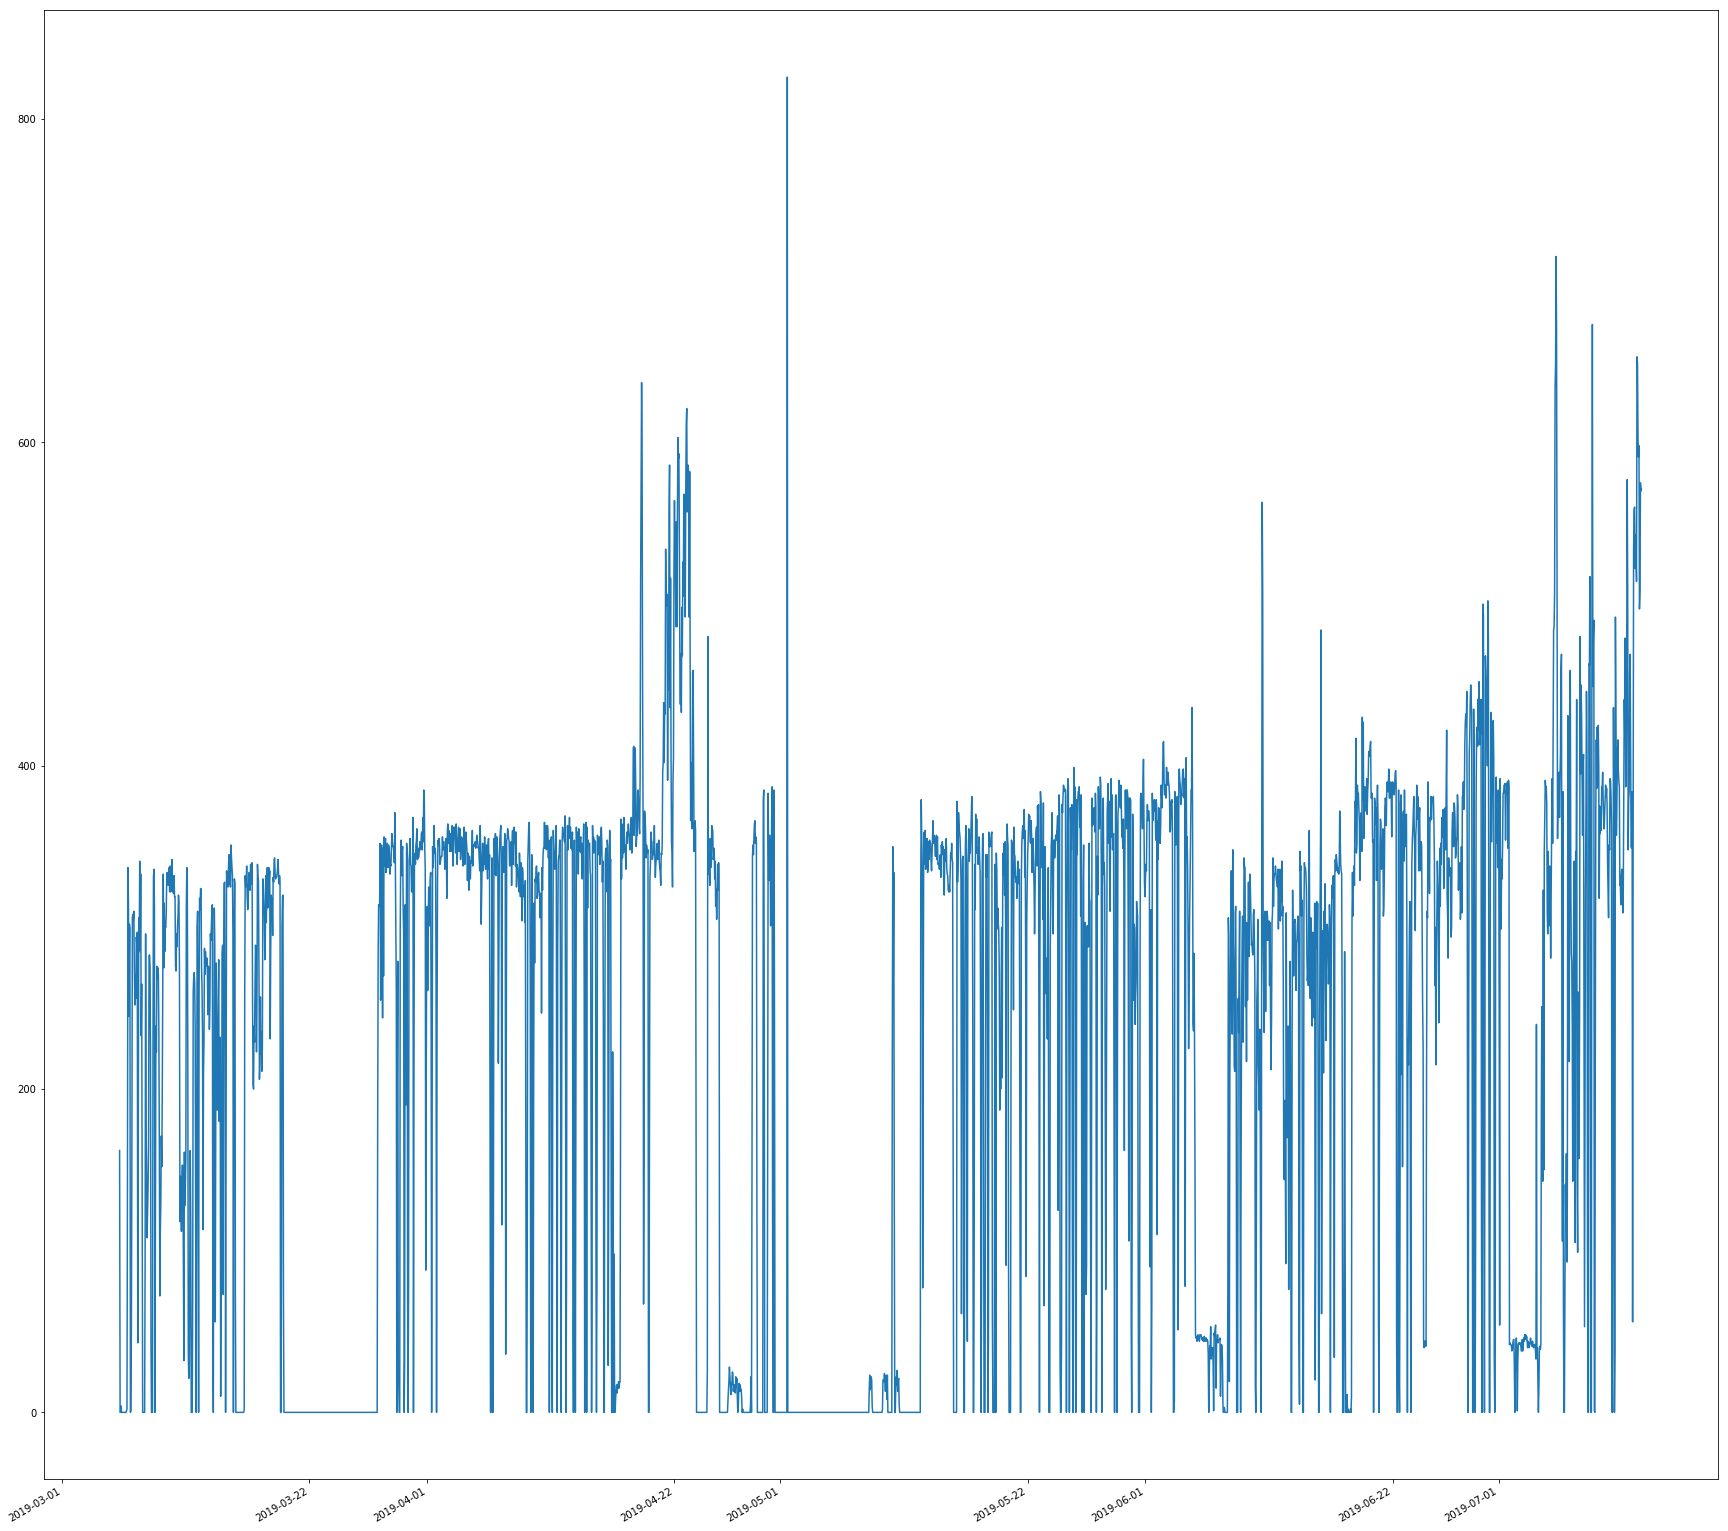

In [14]:
# plot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#x-axis
time_axis=date_list[:3103];

#y-axis
density_axis=density_list[:3103];
plt.figure(figsize=(30,30))
plt.plot(time_axis,density_axis)
plt.gcf().autofmt_xdate()
plt.show()

##### Do the same steps for the port='ind'. for experiment.
     - According to both the figures we can identify the difference of density at given time.
     - Port7 has more AIS message compare to port=ind



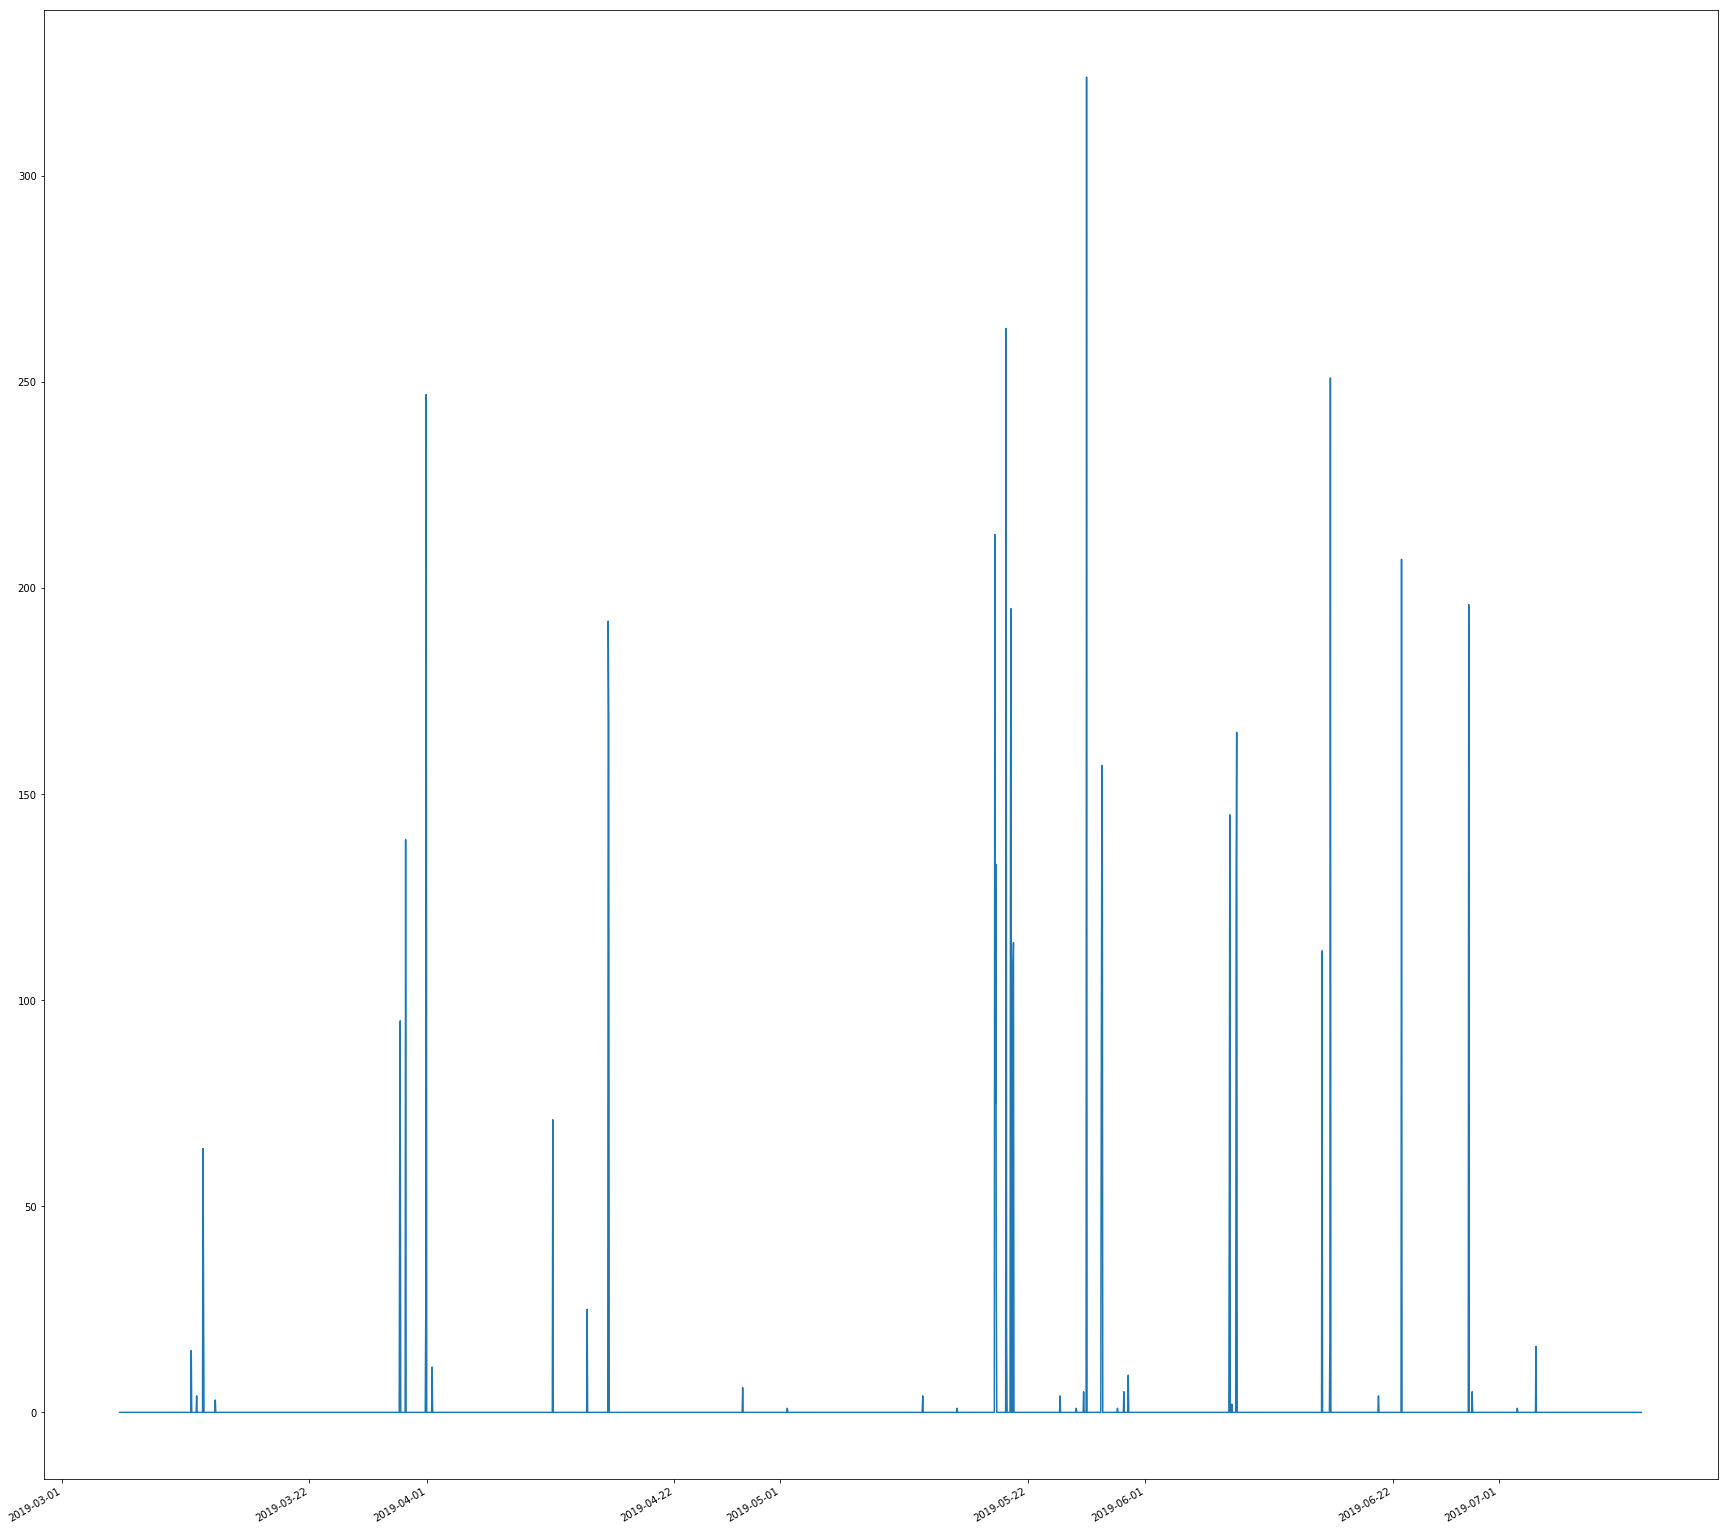

In [15]:
ind_port_data=port_data[port_data.port_name.apply(lambda X :X=='ind')]
# create Buffer
ind_port_buffered_data = ind_port_data.buffer(0.001);

ind_port_geometry=list(ind_port_buffered_data);
ind_density_list=[];
for d in range(0,len(list_dataframe)):
    temp_frame=list_dataframe[d];
    x_value=list(temp_frame['x']);
    y_value=list(temp_frame['y']);
    a=0;
    for k in range(0,len(ind_port_geometry)):
        x_list=[];
        y_list=[];
        for i in range(0,len(x_value)):
            m=x_value[i];
            n=y_value[i];
            points = Point(x_value[i],y_value[i]);
            x=ind_port_geometry[k].contains(points)
            if x is True:
                x_list.append(m);
                y_list.append(n);
                a=a+1;
    ind_density_list.append(a);


#x-axis
time_axis=date_list[:3103];

#y-axis
density_axis=ind_density_list[:3103];
plt.figure(figsize=(30,30))
plt.plot(time_axis,density_axis)
plt.gcf().autofmt_xdate()
plt.show()

### Q5 Drift methods

Concept drift relates to the fact that the output data of a predictive model may change with time in reference to the given input data. The data is progressive and constantly evolving with time. Thus the model with current input fields might not be as accurate in the future with new data points. This understanding is referred to as ‘concept drift’. There could be underlying links in data that may not be visible with the current dataset. Concept drift is usually present where data is constantly collected over a period of time.

AIS messages are like time-stamped heartbeat signals sent over network with vessel coordinates, along with the its speed over ground (SoG) and course over ground (CoG).

In this assignment, part 4 relates to creating a temporal chart for the density of messages at our selected port. We have created a snapshot of density of the selected port at different time intervals. Here, the density snapshot varies with time, and it cannot be guaranteed that the density snapshots will stay the same in the future. Since we are dealing with ports and vessels, there could be many nautical aspects affecting the density at any given time, which in turn are unpredictable or require predictive modeling for estimation. For example, SoG and CoG are entirely dependent on sea conditions and route traffic. This ambiguity adds a concept drift factor in our dataset pertaining to density snapshots of our port.

Unexpected, abrupt and sudden changes in the density are visible along with hints of gradual shifts. Moreover, the time-stamps have variance in intervals and are not periodic in nature. A few methods to accommodate concept drift are as follows:

1. Build a static model with current data and use it for future predictions
2. Upon gathering new data, re-fit your model and update your predictions
3. Weighting attributes as important may also affect the predictability. Eg. A vessel’s speed over ground (SoG) has    more importance than its Maritime Mobile Service Identity (MMSI)
4. We could also remove some datasets which are not in trend anymore. Eg. a route that vessels do not follow anymore.
Sent from my iPhone

### Q6 Cluster the ports based on their message density using DBSCAN and categorize the portsbased on traffic.
        1. we have taken initial 80000 AIS message to generate DBSCAN.(Due to high processing time for all data).
        2. DBSCAN Parameters Values
           - eps = 0.0030
           - min_samples=200 messages.
        3. DBSCAN makes cluster according to the density.
        

766666


/Users/bhumipatel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


3
[0 0 0 ... 0 0 0]


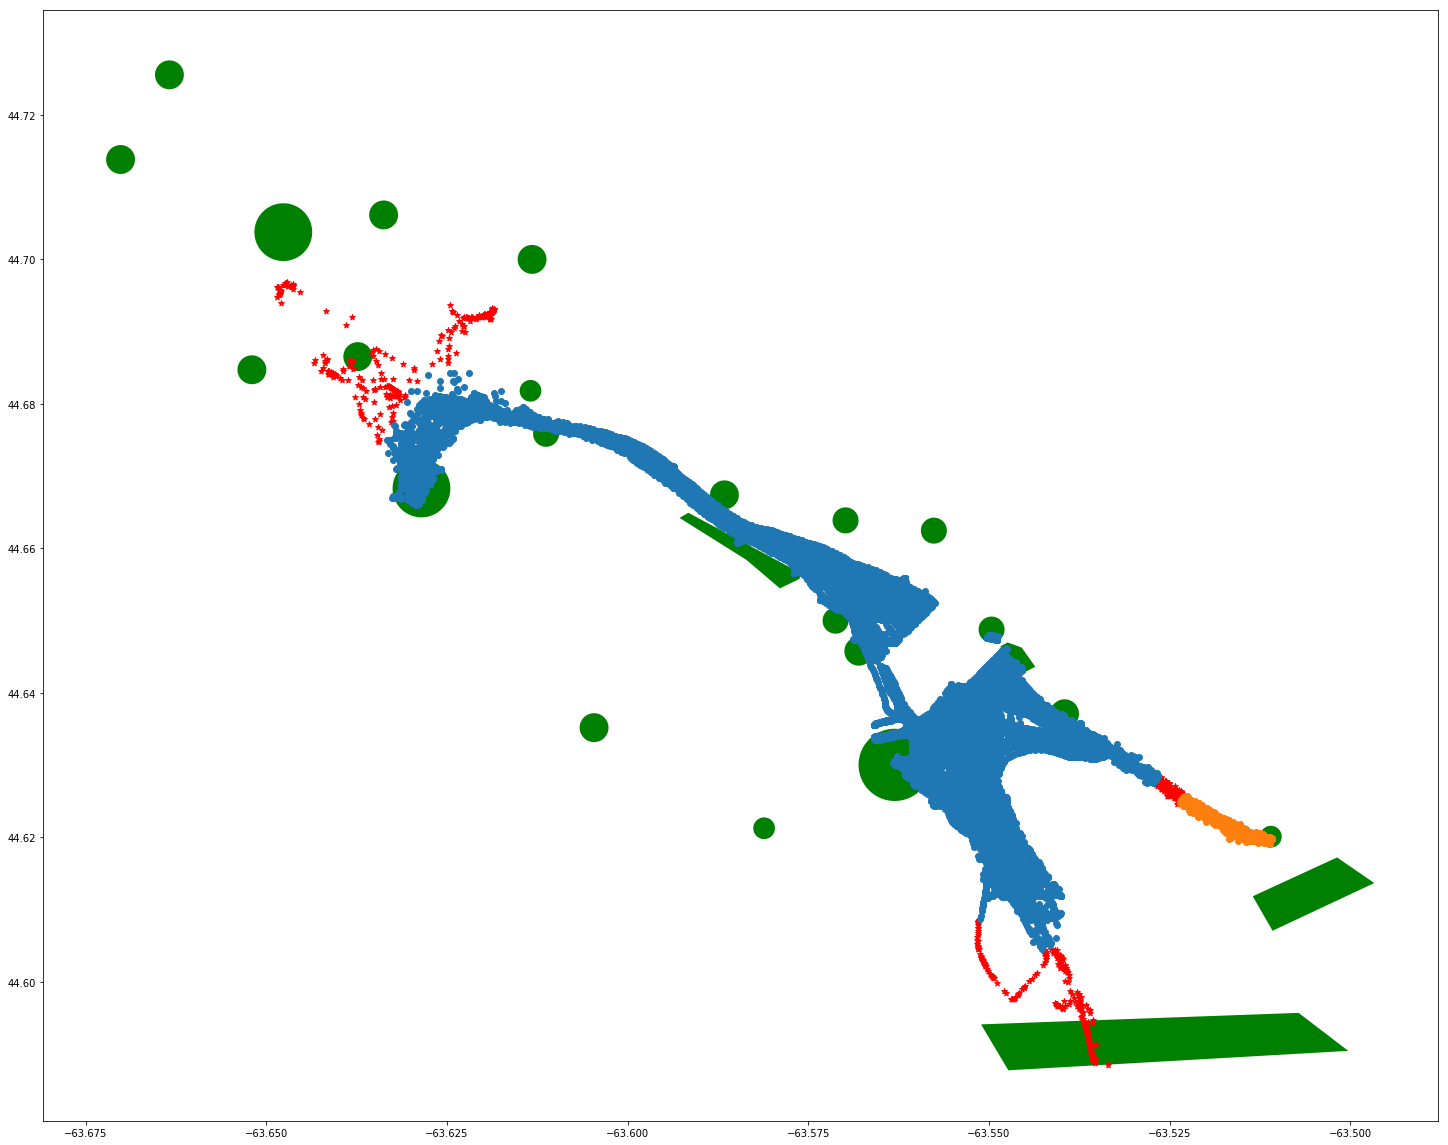

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
AISDATA=pd.read_csv('AISData1.csv')
x_value=list(AISDATA['x']);
y_value=list(AISDATA['y']);
print(len(AISDATA));
k={}
k["X"]=x_value[:80000];
k["Y"]=y_value[:80000];
new_data = pd.DataFrame(k)
m = new_data.as_matrix().astype("float32", copy = False)

clustering = DBSCAN(eps =0.0030, min_samples =200).fit(m)
print(len(np.unique(clustering.labels_)))
print(clustering.labels_)
labels = clustering.labels_

port_data.plot(figsize=(25,25),color="g")
for i in np.unique(clustering.labels_):
    data_i=m[np.where(clustering.labels_==i)[0],:]
    if i==-1:
        plt.scatter(data_i[:,0],data_i[:,1],marker='*',c='r')
    else:
        plt.scatter(data_i[:,0],data_i[:,1])

#### Port with its message density:

<p>According the following data:</p>
 
- Heighest density(704943) : port7

Port having zero density 
 1. port5
 2. port6
 3. NN Jetty 
 4. Bills island
 5. mid bedford
 6. northarm
 7. plll
 8. pp
 9. p003
 10. enter2
 11. p009
 
 

Reference :

1. We have referenced Lab material.
2. https://machinelearningmastery.com/gentle-introduction-concept-drift-machine-learning/
3. https://arxiv.org/abs/1010.4784